<a href="https://colab.research.google.com/github/MK316/workshops/blob/main/20230126_yonsei/display_speech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🔎 Create audio (wav) and display spectrogram with intensity or pitch.

In [5]:
#@markdown [1] Install {parselmouth}, {pydub}
%%capture
!pip install praat-parselmouth
!pip install -U praat-parselmouth
!pip install pydub
!pip install gTTS

from pydub import AudioSegment
from gtts import gTTS
from IPython.display import Audio

In [6]:
#@markdown [2] Create speech from text
from gtts import gTTS
from IPython.display import Audio

def etts(text):
  text_to_say = text

  gtts_object = gTTS(text = text_to_say,
                     lang = "en", tld = "us",
                    slow = False)
  
  gtts_object.save("E-audio.mp3")
  return Audio("E-audio.mp3")


def ktts(text):
  text_to_say = text

  gtts_object = gTTS(text = text_to_say,
                     lang = "ko",
                    slow = False)
  
  gtts_object.save("K-audio.mp3")
  return Audio("K-audio.mp3")

#@markdown 🎯 TTS (synthesize speech)

language = "ko" #@param ["en","ko"]

mytext = input("Type text to create an audio:  ")

if language == "en":
  etts(mytext)
  myaudio = "E-audio.mp3"
elif language == "ko":
  ktts(mytext)
  myaudio = "K-audio.mp3"

import os
audio_file = myaudio # replace with the name of your audio file

# Get the file size in bytes
file_size = os.path.getsize(audio_file)

# Print the file size
print("="*50)
print("File size: ", file_size, "bytes")
Audio(myaudio)

Type text to create an audio:  바다에 파도가 보인다.
File size:  8160 bytes


Type the input file name to convert: K-audio.mp3
Type the output file name to save: sample6.wav


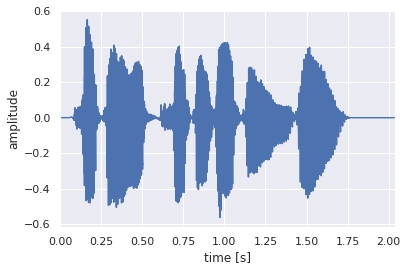

In [11]:
#@markdown 🎯 [3] Convert file formats: K-audio.mp3 => sample.wav
inaudio = input("Type the input file name to convert: ")
outaudio = input("Type the output file name to save: ")
sound = AudioSegment.from_mp3(inaudio)
sound.export(outaudio, format="wav")

import parselmouth

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set() # Use seaborn's default style to make attractive graphs

# Plot nice figures using Python's "standard" matplotlib library
snd = parselmouth.Sound(outaudio)
plt.figure()
plt.plot(snd.xs(), snd.values.T)
plt.xlim([snd.xmin, snd.xmax])
plt.xlabel("time [s]")
plt.ylabel("amplitude")
plt.show() # or plt.savefig("sound.png"), or plt.savefig("sound.pdf")

<ipython-input-12-02ab2ec663c6>:4: RuntimeWarning: divide by zero encountered in log10
  sg_db = 10 * np.log10(spectrogram.values)


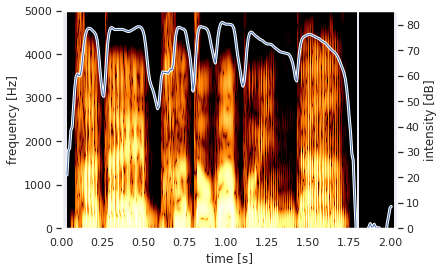

In [12]:
#@markdown [4] Display spectrogram with intensity
def draw_spectrogram(spectrogram, dynamic_range=70):
    X, Y = spectrogram.x_grid(), spectrogram.y_grid()
    sg_db = 10 * np.log10(spectrogram.values)
    plt.pcolormesh(X, Y, sg_db, vmin=sg_db.max() - dynamic_range, cmap='afmhot')
    plt.ylim([spectrogram.ymin, spectrogram.ymax])
    plt.xlabel("time [s]")
    plt.ylabel("frequency [Hz]")

def draw_intensity(intensity):
    plt.plot(intensity.xs(), intensity.values.T, linewidth=3, color='w')
    plt.plot(intensity.xs(), intensity.values.T, linewidth=1)
    plt.grid(False)
    plt.ylim(0)
    plt.ylabel("intensity [dB]")

intensity = snd.to_intensity()
spectrogram = snd.to_spectrogram()
plt.figure()
draw_spectrogram(spectrogram)
plt.twinx()
draw_intensity(intensity)
plt.xlim([snd.xmin, snd.xmax])
plt.show() # or plt.savefig("spectrogram.pdf")

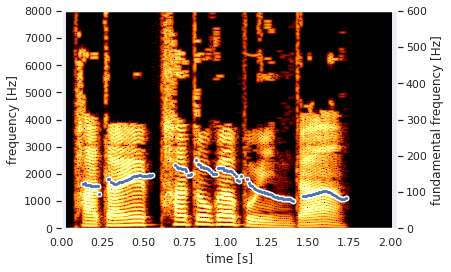

In [13]:
#@markdown Display spectrogram with pitch (fundamental frequency)
def draw_pitch(pitch):
    # Extract selected pitch contour, and
    # replace unvoiced samples by NaN to not plot
    pitch_values = pitch.selected_array['frequency']
    pitch_values[pitch_values==0] = np.nan
    plt.plot(pitch.xs(), pitch_values, 'o', markersize=5, color='w')
    plt.plot(pitch.xs(), pitch_values, 'o', markersize=2)
    plt.grid(False)
    plt.ylim(0, pitch.ceiling)
    plt.ylabel("fundamental frequency [Hz]")

pitch = snd.to_pitch()
# If desired, pre-emphasize the sound fragment before calculating the spectrogram
pre_emphasized_snd = snd.copy()
pre_emphasized_snd.pre_emphasize()
spectrogram = pre_emphasized_snd.to_spectrogram(window_length=0.03, maximum_frequency=8000)
plt.figure()
draw_spectrogram(spectrogram)
plt.twinx()
draw_pitch(pitch)
plt.xlim([snd.xmin, snd.xmax])
plt.show() # or plt.savefig("spectrogram_0.03.pdf")